# Python Data Analysis of Major Spaceflight Milestones
## A Python Project by Ian Takaoka

## Introduction

*Since 1961, **600 humans** have achieved spaceflight from **37 countries**, and this number increases yearly.*
*This project aims to use Python with Wikipedia integration to provide information and useful statistics on some of these astronauts.*

## Data Import
Credits: Mariya Stavnichuk and Tatsuya Corlett (original database), Georgios Karamanis via Kaggle (for csv)

From the author: 
>*"This database contains publically available information about all astronauts who participated in space missions before 15 January 2020 collected from NASA, Roscosmos, and fun-made websites. The provided information includes full astronaut name, sex, date of birth, nationality, military status, a title and year of a selection program, and information about each mission completed by a particular astronaut such as a year, ascend and descend shuttle names, mission and extravehicular activity (EVAs) durations."*

Limitations (from me): 
This does not include spaceflight statistics after January 2020. As the Soviet Union did not distinguish between nationalities within its borders, the USSR/Russia field may include cosmonauts from other Soviet Republics and not specifically from the Russian SFSR. Additionally, no commercial astronauts are listed, as SpaceX's Crew Dragon Demo-2, the first manned commercial spaceflight, did not launch until May 2020. 


In [311]:
import pandas as pd
import numpy as np

##Will return info from Wikipedia about specific individuals. Make sure to pip install wikipedia before proceeding with this program
import wikipedia as wiki
##Runs the Cyrtranslit module as data cleaning for Cyrillic names. Make sure to pip install cyrtranslit before proceeding
##import cyrtranslit as cyr

from matplotlib import pyplot as plt
##Under the hood to allow multiple Wikipedia summaries per cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

pd.set_option('chained_assignment',None)


astronaut_raw = pd.read_csv('astronauts.csv')
astronaut_raw.drop_duplicates(subset=['name' , 'original_name'], keep= 'first')

,id,number,nationwide_number,name,original_name,sex,year_of_birth,nationality,military_civilian,selection,...,year_of_mission,mission_title,ascend_shuttle,in_orbit,descend_shuttle,hours_mission,total_hrs_sum,field21,eva_hrs_mission,total_eva_hrs
0,1,1,1,"Gagarin, Yuri",ГАГАРИН Юрий Алексеевич,male,1934,U.S.S.R/Russia,military,TsPK-1,...,1961,Vostok 1,Vostok 1,Vostok 2,Vostok 3,1.77,1.77,0,0.00,0.00
1,2,2,2,"Titov, Gherman",ТИТОВ Герман Степанович,male,1935,U.S.S.R/Russia,military,TsPK-1,...,1961,Vostok 2,Vostok 2,Vostok 2,Vostok 2,25.00,25.30,0,0.00,0.00
2,3,3,1,"Glenn, John H., Jr.","Glenn, John H., Jr.",male,1921,U.S.,military,NASA Astronaut Group 1,...,1962,MA-6,MA-6,MA-6,MA-6,5.00,218.00,0,0.00,0.00
4,5,4,2,"Carpenter, M. Scott","Carpenter, M. Scott",male,1925,U.S.,military,NASA- 1,...,1962,Mercury-Atlas 7,Mercury-Atlas 7,Mercury-Atlas 7,Mercury-Atlas 7,5.00,5.00,0,0.00,0.00
5,6,5,2,"Nikolayev, Andriyan",НИКОЛАЕВ Андриян Григорьевич,male,1929,U.S.S.R/Russia,military,TsPK-1,...,1962,Vostok 3,Vostok 3,Vostok 3,Vostok 3,94.00,519.33,0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,1273,561,345,"McClain, Anne Charlotte","McClain, Anne Charlotte",female,1979,U.S.,military,NASA-21,...,2018,57,Soyuz MS-11,ISS,Soyuz MS-11,4887.00,4887.00,2,13.13,13.13
1273,1274,562,346,"Koch, Christina","Koch, Christina",female,1979,U.S.,civilian,NASA-21,...,2019,59,Soyuz MS-12,ISS,not completed yet,7372.30,7372.30,4,27.80,27.80
1274,1275,563,347,"Morgan, Andrew","Morgan, Andrew",male,1976,U.S.,military,NASA-21,...,2019,60,Soyuz MS-13,ISS,not completed yet,4303.08,4303.08,6,39.52,39.52
1275,1276,564,348,"Meir, Jessica","Meir, Jessica",female,1977,U.S.,civilian,NASA-21,...,2019,60,Soyuz MS-15,ISS,not completed yet,2697.60,2697.60,1,7.28,7.28


## Astronaut Age
During the Space Race, the first astronauts and cosmonauts were primarily drawn from the military and government sectors. Specifically, due to the highly experimental nature of early manned spaceflight, the first astronauts were almost exclusively test pilots from the armed forces, and as such were well into their military careers. Civilians were eventually drawn into the space program, typically highly degreed scientists as mission specialists. Currently, NASA maintains that Astronaut Candidates (ASCANs) must have at least a Master's degree in a Science, Technology, Engineering, and Mathematics (STEM) field and extensive professional experience, or 1000 hours of pilot command time in jet aircraft. This tends to skew average astronaut ages at selection to early 30s, with crew selections set years in advance of mission launch to allow for adequate training and mission control experience. Thus, many astronauts are in their early 40s at mission launch. 

The youngest astronauts at time of selection were the Soviet cosmonauts **Pyotr Klimuk** , **Gennady Sarafanov** and **Vyacheslav Zudov,** who were each 23 years old. The youngest humans to achieve spaceflight were Soviet cosmonauts **Gherman Titov** and **Valentina Tereshkova**, each at 26 years old. 32 year old **Sally Ride** is the youngest American to achieve spaceflight.

Private citizen **Dennis Tito** at 60 years old currently holds the record for oldest astronaut at selection, while American career astronaut **John Glenn** is the oldest astronaut at time of launch at 77 years old*.

<sub><sup>As of 2022, 90-year old actor William Shatner surpassed John Glenn as the oldest human in space with Blue Origin. As mentioned previously, this is beyond the scope of the dataset</sup></sub>

### Age At Selection

In [312]:
df1 = astronaut_raw[['name', 'year_of_birth', 'year_of_selection', 'nationality', 'selection']]

df1['age_at_selection'] = df1['year_of_selection'] - df1['year_of_birth']

df1.drop_duplicates(subset=['name'], keep= 'first')

,name,year_of_birth,year_of_selection,nationality,selection,age_at_selection
0,"Gagarin, Yuri",1934,1960,U.S.S.R/Russia,TsPK-1,26
1,"Titov, Gherman",1935,1960,U.S.S.R/Russia,TsPK-1,25
2,"Glenn, John H., Jr.",1921,1959,U.S.,NASA Astronaut Group 1,38
4,"Carpenter, M. Scott",1925,1959,U.S.,NASA- 1,34
5,"Nikolayev, Andriyan",1929,1960,U.S.S.R/Russia,TsPK-1,31
...,...,...,...,...,...,...
1272,"McClain, Anne Charlotte",1979,2013,U.S.,NASA-21,34
1273,"Koch, Christina",1979,2013,U.S.,NASA-21,34
1274,"Morgan, Andrew",1976,2013,U.S.,NASA-21,37
1275,"Meir, Jessica",1977,2013,U.S.,NASA-21,36


<Figure size 864x432 with 0 Axes>

Text(0.5, 0, 'Selection Year')

Text(0, 0.5, 'Age at First Selection')

Text(0.5, 1.0, 'Distribution of Astronaut Candidate Age')

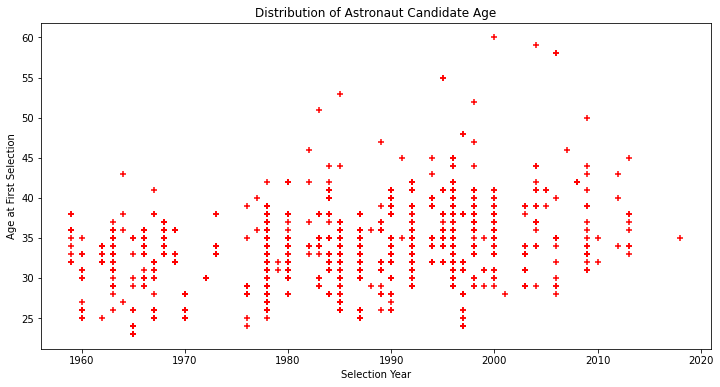

In [313]:
selection_year = df1[['year_of_selection']].to_numpy()
selection_age = df1[['age_at_selection']].to_numpy()
plt.figure(figsize = (12, 6))
plt.scatter(selection_year, selection_age, marker= '+', color = 'red')
plt.xlabel('Selection Year')
plt.ylabel('Age at First Selection')
plt.title('Distribution of Astronaut Candidate Age')
plt.show()

In [314]:
##Mean Age of Astronaut Candidates
df1_mean = (df1.age_at_selection.mean())
print('The average age of all astronaut candidates prior to 2020 is ' + str(round(df1_mean)) + ' ' + 'years old.' )

The average age of all astronaut candidates prior to 2020 is 34 years old.


In [315]:
##Youngest Astronauts at Selection
df1_youngest = (df1[df1.age_at_selection == df.age_at_selection.min()])
df1_youngest.drop_duplicates(subset=['name'], keep= 'first')

,name,year_of_birth,year_of_selection,nationality,selection,age_at_selection
146,"Klimuk, Pyotr",1942,1965,U.S.S.R/Russia,TsPK-3,23
152,"Sarafanov, Gennadi",1942,1965,U.S.S.R/Russia,TsPK-3,23
167,"Zudov, Vyacheslav",1942,1965,U.S.S.R/Russia,TsPK-3,23


In [316]:
##Oldest Astronaut at Selection 
df1_oldest = (df1[df1.age_at_selection == df.age_at_selection.max()])
df1_oldest.drop_duplicates(subset=['name'], keep= 'first')

,name,year_of_birth,year_of_selection,nationality,selection,age_at_selection
998,"Tito, Dennis Anthony",1940,2000,U.S.,MirCorp,60


In [317]:
wiki.summary(df1_oldest['name'])

'Dennis Anthony Tito (born August 8, 1940) is an American engineer, entrepreneur and astronaut. In mid-2001, he became the first space tourist to fund his own trip into space, when he spent nearly eight days in orbit as a crew member of ISS EP-1, a visiting mission to the International Space Station. This mission was launched by the spacecraft Soyuz TM-32, and was landed by Soyuz TM-31.'

### Age at Spaceflight

In [318]:
df2 = astronaut_raw[['name', 'year_of_birth', 'year_of_mission', 'nationality', 'mission_title']]

df2['age_at_mission'] = df2['year_of_mission'] - df2['year_of_birth']

df2

,name,year_of_birth,year_of_mission,nationality,mission_title,age_at_mission
0,"Gagarin, Yuri",1934,1961,U.S.S.R/Russia,Vostok 1,27
1,"Titov, Gherman",1935,1961,U.S.S.R/Russia,Vostok 2,26
2,"Glenn, John H., Jr.",1921,1962,U.S.,MA-6,41
3,"Glenn, John H., Jr.",1921,1998,U.S.,STS-95,77
4,"Carpenter, M. Scott",1925,1962,U.S.,Mercury-Atlas 7,37
...,...,...,...,...,...,...
1272,"McClain, Anne Charlotte",1979,2018,U.S.,57,39
1273,"Koch, Christina",1979,2019,U.S.,59,40
1274,"Morgan, Andrew",1976,2019,U.S.,60,43
1275,"Meir, Jessica",1977,2019,U.S.,60,42


<Figure size 864x432 with 0 Axes>

Text(0.5, 0, 'Mission Year')

Text(0, 0.5, 'Age at Mission Launch')

Text(0.5, 1.0, 'Distribution of Astronaut Age at Time of Spaceflight')

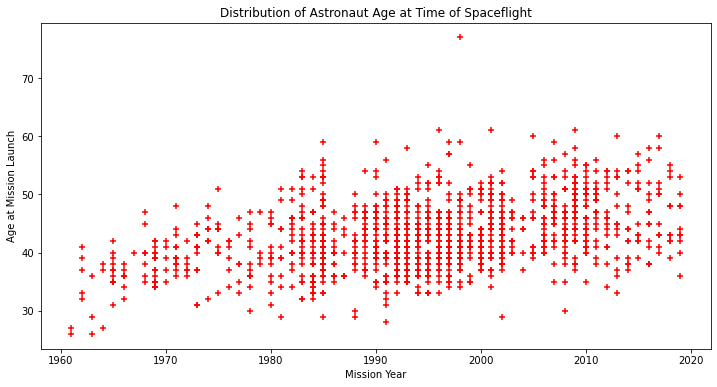

In [319]:
mission_year = df2[['year_of_mission']].to_numpy()
mission_age = df2[['age_at_mission']].to_numpy()
plt.figure(figsize = (12, 6))
plt.scatter(mission_year, mission_age, marker= '+', color = 'red')
plt.xlabel('Mission Year')
plt.ylabel('Age at Mission Launch')
plt.title('Distribution of Astronaut Age at Time of Spaceflight')
plt.show()

In [320]:
##Mean Age of Astronauts at Mission Launch
df2_mean = (df2.age_at_mission.mean())
print('The average age of all astronauts at mission launch prior to 2020 is ' + str(round(df2_mean)) + ' ' + 'years old.' )

The average age of all astronauts at mission launch prior to 2020 is 43 years old.


In [321]:
##Youngest Astronauts at Mission Launch
df2_youngest = (df2[df2.age_at_mission == df2.age_at_mission.min()])
df2_youngest.drop_duplicates(subset=['name'], keep= 'first')

,name,year_of_birth,year_of_mission,nationality,mission_title,age_at_mission
1,"Titov, Gherman",1935,1961,U.S.S.R/Russia,Vostok 2,26
17,"Tereshkova, Valentina",1937,1963,U.S.S.R/Russia,Vostok 6,26


In [322]:
wiki.summary(df2_youngest['name'], sentences=3)

'Valentina Vladimirovna Tereshkova (Russian: Валентина Владимировна Терешкова, IPA: [vɐlʲɪnʲˈtʲinə vlɐˈdʲimʲɪrəvnə tʲɪrʲɪʂˈkovə] (listen); born 6 March 1937) is an engineer, member of the Russian State Duma, and former Soviet cosmonaut. She is known for being the first and youngest woman in space, having flown a solo mission on the Vostok 6 on 16 June 1963. She orbited the Earth 48 times, spent almost three days in space, and remains the only woman to have been on a solo space mission.'

In [323]:
#Oldest Astronauts at Mission Launch
df2_oldest = (df2[df2.age_at_mission == df2.age_at_mission.max()])
df2_oldest.drop_duplicates(subset=['name'], keep= 'first')

,name,year_of_birth,year_of_mission,nationality,mission_title,age_at_mission
3,"Glenn, John H., Jr.",1921,1998,U.S.,STS-95,77


In [324]:
wiki.summary(df2_oldest['name'], sentences=4)

'John Herschel Glenn Jr. (July 18, 1921 – December 8, 2016) was an American aviator in the United States Marine Corps, engineer, astronaut, businessman, and politician. He was the third American in space, and the first American to orbit the Earth, circling it three times in 1962. Following his retirement from NASA, he served from 1974 to 1999 as a Democratic United States Senator from Ohio; in 1998, he flew into space again at age 77.'